El Modelo SIR
Un modelo clásico de epidemiología es el llamado modelo SIR de Kermack y McKendrick. El nombre del modelo es debido a las iniciales en ingles de Susceptibles, Infectives y Removed. El modelo relaciona las variaciones las tres poblaciones (Susceptible, Infectada y Recuperada) a través de la tasa de infección y el período infeccioso promedio.

Algunos de los modelos epidemiológicos se basan en dividir a la población sujeta a la infección en pequeños grupos separados, cada grupos contiene solo individuos idénticos (respecto a su estado de infección). En el modelo SIR, existen tres grupos compartimentados:

Población susceptible (S), individuos sin inmunidad al agente infeccioso, y que por tanto puede ser infectada si es expuesta al agente infeccioso.
Población infectada (I), indiviuos que están infectados en un momento dado y pueden transmitir la infección a individuos de la población suscpetible con la que entran en contacto.
Población recuperada (R), individuos que son inmunes a la infección, y consecuentemente no afectan a la transmisión cuando entran en contacto con otros individuos.
La población total es $ N=S+I+R $. Las ecuaciones que describen la variación temporal del número de individuos en cada estado de infección:

$$ \frac{dR}{dt}=\gamma I $$$$ \frac{dS}{dt}=-\frac{\beta SI}{N} $$$$ \frac{dI}{dt}=\frac{\beta SI}{N}-\gamma I $$
donde $ \beta $ es la tasa efectiva entre saludables e infecciosos, y $ \gamma $ es la tasa efectiva entre infecciosos y removidos (osea recuperados o muertos)

In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

In [3]:
class Covid19Model:
    """explicacion"""
    def __init__(self,_N=None,_beta=None,_gamma=None,_I0=None,_S0=None):
        #para evitar que se inicialicen en valores nullos
        if _N is None:
            _N=1000
        if _beta is None:
            _beta=0.2
        if _gamma is None:
            _gamma=0.1
        if _I0 is None:
            _I0=1
        if _S0 is None:
            _S0=_N-_I0
        '''Tamaño poblacional'''
        self.N=_N
        '''tasa efectiva (Beta/N) entre saludables e infecciosos'''
        self.beta=_beta
        '''tasa efectiva (Gamma/N) entre infecciosos y removidos (recuperados o muertos)'''
        self.gamma=_gamma
        '''Número inicial de Individuos Infectados'''
        self.I0=_I0
        '''Número inicial de Individuos Suseptibles'''
        self.S0=_S0
        
    #Funciones
    """Equaciones diferenciales"""
    def diff_eqs(self,INP,t):  
        Y=np.zeros((3))#array de ceros
        V = INP
        '''Las ecuaciones diferenciales'''
        Y[0] = - self.beta * V[0] * V[1]/self.N
        Y[1] = self.beta * V[0] * V[1]/self.N - self.gamma * V[1]
        Y[2] = self.gamma * V[1]
        return Y   # For odeint
        
    def Grafica(self,_TS,_ND):
        '''_TS Tamaño del paso temporal'''
        '''_ND Número de dias'''
        t_start = 0.0 
        t_end = _ND 
        t_inc = _TS
        INPUT= (self.S0, self.I0, 0.0)
        t_range = np.arange(t_start, t_end+t_inc, t_inc)
        RES = spi.odeint(self.diff_eqs,INPUT,t_range)
        #Gráfica
        pl.plot(RES[:,0]*self.N, '-g', label='Susceptibles')
        pl.plot(RES[:,2]*self.N, '-k', label='Recuperados')
        pl.plot(RES[:,1]*self.N, '-r', label='Infectados')
        pl.legend(loc=0)
        pl.title('Modelo SIR básico')
        pl.xlabel('Tiempo')
        return pl

Instancio un objeto Covid19Model, con los valores por defecto. $ \beta=0.2 $


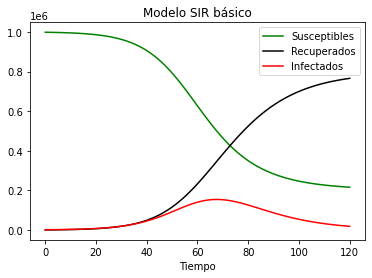

In [4]:
#Usando los valores por defecto N=1000;beta=0.2;gamma=0.1;I0=1;S0=N-I0
Covid00=Covid19Model()
Covid00.Grafica(1.0,120.0).savefig("00")#Para salvar el grafico


Si se aumenta el valor de la tasa de infección
$ \beta=0.3 $

In [5]:
'''tamaño poblacional'''
N=100
beta=0.3
gamma=0.1
'''time step'''
TS=1.0 
ND=100.0
I0=1
S0=N-I0

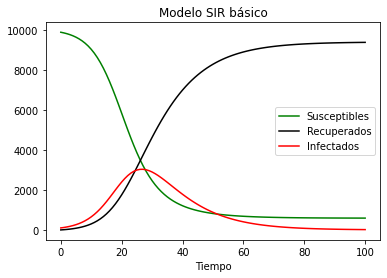

In [6]:
Covid01=Covid19Model(N,beta,gamma,I0,S0)
Covid01.Grafica(TS,ND).savefig("01")

Ahora reduzco valor de la tasa de infección
$ \beta=0.1.5 $

In [7]:
#Cambiando beta por uno menor
beta=0.15

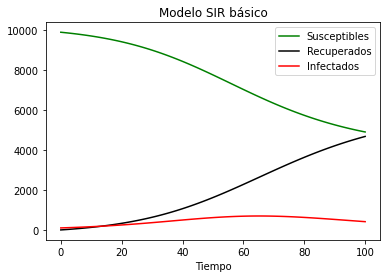

In [8]:
Covid02=Covid19Model(N,beta,gamma,I0,S0)
Covid02.Grafica(TS,ND).savefig("02")

Aumento el valor de la tasa de recuperación/muerte
$ \gamma=0.15 $ y $ \beta=0.2 $

In [9]:
beta=0.2
gamma=0.15

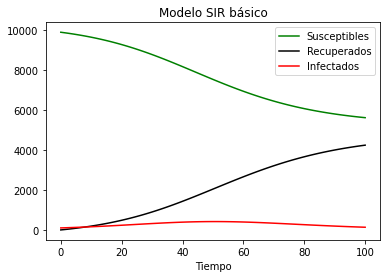

In [10]:
Covid03=Covid19Model(N,beta,gamma,I0,S0)
Covid03.Grafica(TS,ND).savefig("03")

Ahora reduzco valor de la tasa de recuperación/muerte
$ \gamma=0.05 $ y $ \beta=0.2 $

In [11]:
beta=0.2
gamma=0.05

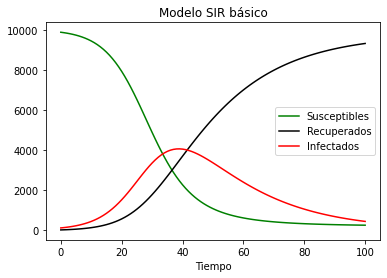

In [12]:
Covid04=Covid19Model(N,beta,gamma,I0,S0)
Covid04.Grafica(TS,ND).savefig("04")